In [118]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,classification_report 

In [119]:
dataframe=pd.read_csv(r"Dataset\Car_Prices_Data.csv")

In [120]:
print(dataframe.columns.to_list())
dataframe.head(5)

['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors', 'Weight']


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [121]:
dataframe.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1434.000000,1436.000000,1436.000000,1436.000000,1436.000000,1434.000000,1436.000000,1434.000000
mean,10730.824513,55.986750,68533.259749,101.502089,0.674791,0.055710,1566.990934,4.033426,1072.487448
std,3626.964585,18.581796,37506.448872,14.981080,0.468616,0.229441,187.178221,0.952677,52.672475
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000


In [122]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1434 non-null   float64
 2   KM         1436 non-null   int64  
 3   FuelType   1432 non-null   object 
 4   HP         1436 non-null   int64  
 5   MetColor   1436 non-null   int64  
 6   Automatic  1436 non-null   int64  
 7   CC         1434 non-null   float64
 8   Doors      1436 non-null   int64  
 9   Weight     1434 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [123]:
print(dataframe.isnull().sum()) # Checking if there is any empty data
# There are empty data
print(dataframe.duplicated().sum()) # Checking if there is any duplicate data

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64
1


In [124]:
dataframe.dropna(axis=0,inplace=True) # Dropping rows which contains missing values
dataframe.drop_duplicates(inplace=True)
dataframe.isnull().sum() 

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

Average car price: {10714.150175438597}
Maximum car price: {32500}
Minimum car price: {4350}


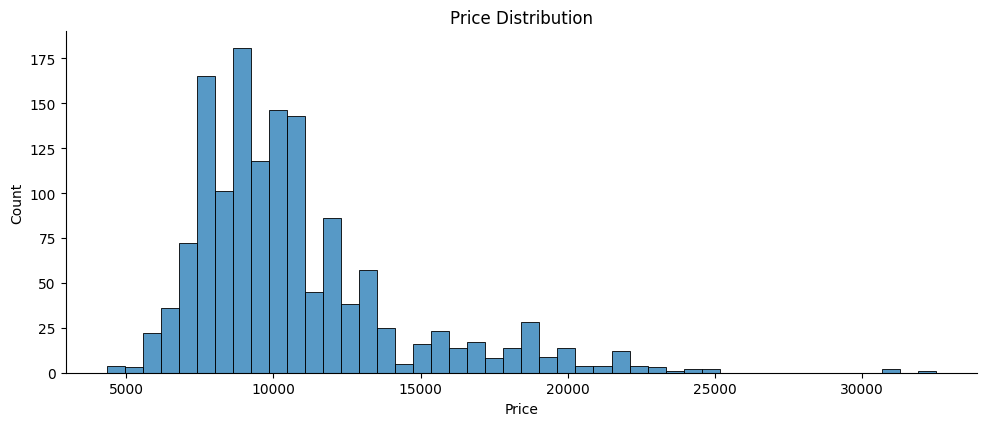

In [143]:
graph1=sb.displot(dataframe["Price"],kind="hist")
graph1.fig.set_size_inches(11,4)
graph1.set(title="Price Distribution")
print(f"Average car price:",{dataframe["Price"].mean()})
print(f"Maximum car price:",{dataframe["Price"].max()})
print(f"Minimum car price:",{dataframe["Price"].min()})


Correlation berween mileage and price:-0.5706478235116679


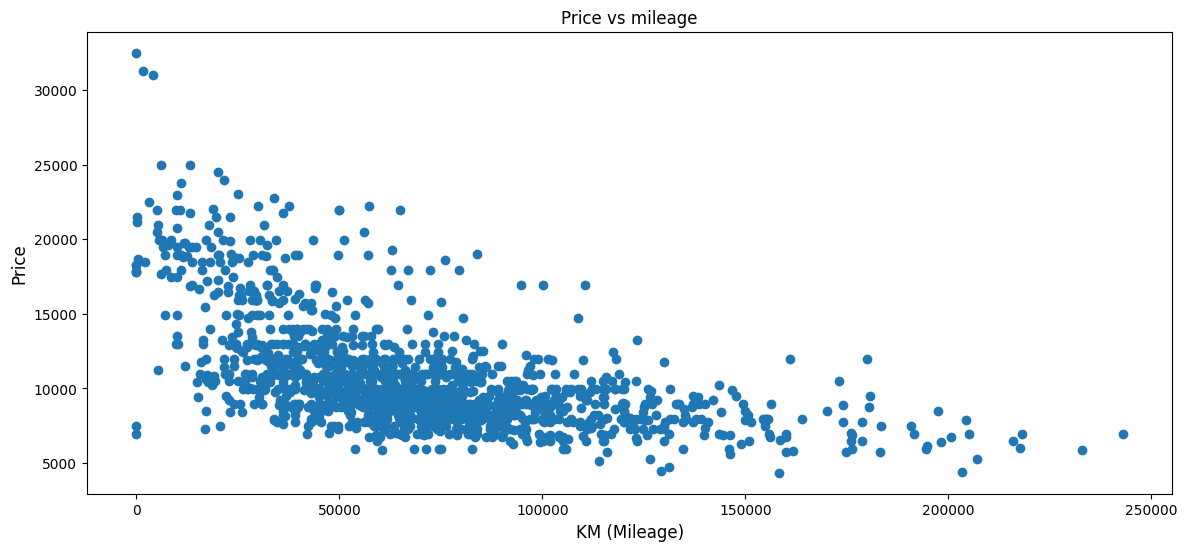

In [126]:
fig=plt.figure(figsize=(14,6))
graph3=plt.scatter(x=dataframe["KM"],y=dataframe["Price"])
# This graph shows the relation between mileage and price
plt.xlabel("KM (Mileage)",fontsize=12)
plt.ylabel("Price",fontsize=12)
plt.title("Price vs mileage")
price_col=dataframe["Price"]
mileage_col=dataframe["KM"]
print(f"\nCorrelation berween mileage and price:{price_col.corr(mileage_col)}")  
# The relation between mileage and price is inversely proportional, as mileage increases the price decreases

              Price       Age        KM        HP  Automatic
Price      1.000000 -0.877193 -0.570648  0.306556   0.037152
Age       -0.877193  1.000000  0.507098 -0.152868   0.027973
KM        -0.570648  0.507098  1.000000 -0.335554  -0.081109
HP         0.306556 -0.152868 -0.335554  1.000000   0.017862
Automatic  0.037152  0.027973 -0.081109  0.017862   1.000000


<AxesSubplot:>

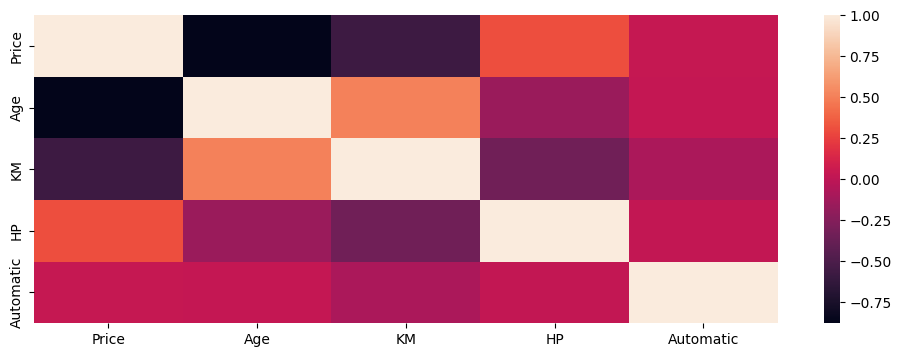

In [127]:
copy_dataframe=dataframe.copy()
new_copy_dataframe=copy_dataframe.drop(columns=["MetColor","CC","Doors","Weight"]) #Dropping the unwanted columns
correlation_matrix=new_copy_dataframe.corr(method='pearson')
print(correlation_matrix)
# Positive correlation tells that the relation between variables are proportional, they move in same direction.
# Negative correlation tells that the relation moves in oppositve direction
plt.figure(figsize=(12,4))
sb.heatmap(correlation_matrix) # Correlation graph

In [128]:
# Converting Categorical Fueltype fatures to numerical values
label_encoder=LabelEncoder()
label_encoder.fit(dataframe["FuelType"])
dataframe["FuelType"]=label_encoder.transform(dataframe["FuelType"])
print("1:Diesel 2:Petrol 0:CNG\n",dataframe["FuelType"].unique()) # After converting to numerical

1:Diesel 2:Petrol 0:CNG
 [1 2 0]


In [129]:
# Sorting the dataframe in ascending order based on Price category 
newdataframe=dataframe.sort_values(["Price"],ascending=False)

In [130]:
newdataframe.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
109,32500,4.0,1,1,116,0,0,2000.0,5,1480.0
111,31275,4.0,1500,1,116,1,0,2000.0,5,1480.0
110,31000,4.0,4000,1,116,1,0,2000.0,5,1480.0
115,24990,8.0,6000,1,90,1,0,2000.0,5,1280.0
112,24950,8.0,13253,1,116,1,0,2000.0,5,1320.0


In [131]:
# CREATING THE MODEL
X=dataframe.drop(columns=["Price"]).values# Every column is grabbed except Price column
y=dataframe["Price"].values

In [132]:
# Splitting data into test and train
print(dataframe.shape) # There are 1426 rows in the file

# 30 percent of the data reserved for testing, rest reserved for training
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Transforming the X_test and X_train data between 0 and 1
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
print(X_train.shape,X_test.shape) 
print(y_train.shape,y_test.shape) 

(1425, 10)
(997, 9) (428, 9)
(997,) (428,)


In [133]:
# BUILDING THE LINEAR REGRESSION MODEL
model=LinearRegression() # Regression equation: y=m*x+b
# y is the prices that are going to be predicted, m is the coefficients, x is the features, b is the intercept.
# where y is the dependent variable, x is the independent variable
model.fit(X_train,y_train)

LinearRegression()

In [134]:
y_pred=model.predict(X_test) # Making the prediction

In [135]:
print(f"Coefficients:{model.coef_}") # Coefficient factors for each feature
# Negative coefficient is sign of inverse proportion. As the independent variable increases,dependant variable decreases
print(f"Intercept:{model.intercept_}") # Intercept value 
print(f"Mean Squarred Error:{mean_squared_error(y_test,y_pred)}")
print(f"R2 Score:{r2_score(y_test,y_pred)}")# R2 score is measure of how close the data points are fitted to the line

Coefficients:[-9729.77484107 -4156.65593257    39.57574811  4067.77950768
    39.66027083   284.64079736  -880.30399873  -161.13165182
 12796.14207875]
Intercept:16451.168832910407
Mean Squarred Error:1894687.5773597127
R2 Score:0.8481700114655301


[Text(0.5, 0, 'Predicted values'),
 Text(0, 0.5, 'Actual values'),
 Text(0.5, 1.0, 'Linear Regression')]

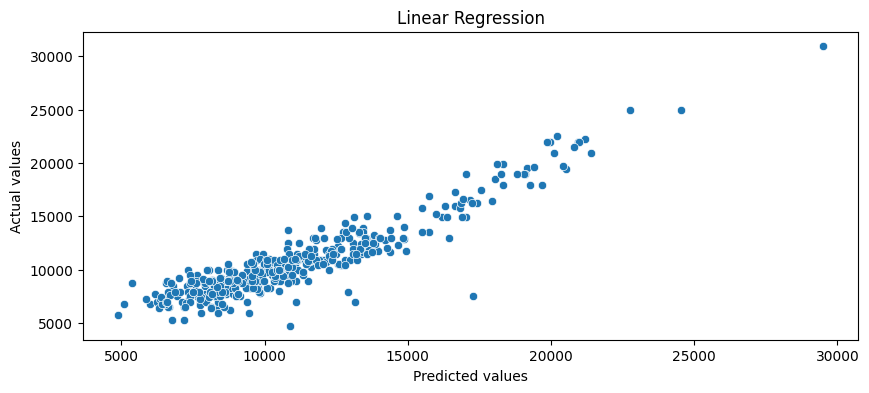

In [164]:
# RESULT
fig=plt.figure(figsize=(10,4))
sp=sb.scatterplot(x=y_pred,y=y_test,ci=68)
sp.set(xlabel="Predicted values",ylabel="Actual values",title="Linear Regression")